### Da fare:
1) fai vedere Mc dropout al variare dei num predizioni come varia (1,3,5,10,25,100) (da 25 in poi poco sensibile cambiamento)
2) fai vedere che alla fine meglio Ensamble learning (articoli lo dicono)
3) crea codice Sostituisci Dropout

## Sostituisci Dropout

In [ ]:
# Qui per ogni modello passato, gli sostituico i layer di dropout per farli diventare MCdropout
from tensorflow import keras
from keras.layers import  Dropout
class MCDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

def drot_to_MCdrop(model_path):
model = keras.models.load_model(model_path)

model_MCD = keras.models.Sequential()
for layer in model.layers
######################################################################################################################################################################
DA FARE ANCORA
    

## PREDICI

In [1]:
from Classe_sismogramma_v3 import ClasseDataset
from tensorflow import keras
from keras.layers import  Dropout
import numpy as np
import pandas as pd
import gc

class MCDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

def predici(modello, dati, pred, i, batch=2048):
    y_predicted = modello.predict(dati, batch_size=batch)
    y_predicted = np.reshape(y_predicted,len(y_predicted))
    pred[f"pred_n_{i}"] = y_predicted

2023-09-23 10:45:59.780047: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
hdf5_predicting = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_data_tot_no0_semiamp_80.hdf5"
csv_predicting = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_metadata_tot_no0.csv"

Data_predicting = ClasseDataset()
Data_predicting.leggi_custom_dataset(hdf5_predicting, csv_predicting)
sample_train = len(Data_predicting.sismogramma)
print("Ho Letto dataset")
lung = len(Data_predicting.sismogramma[0])
semi_amp = 80

Ho Letto dataset


In [ ]:
impostazione = "8"          # quale rete prendere (per ora More 1 o More 2 o etc)
replica = "4"               # scelgo rete More_impostazione / replica
quante_predizioni = 7
salva_predizioni = True
time_shift = 0

tent = f"More_{impostazione}_{replica}"
model_pat = f'/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_{impostazione}/{replica}/Tentativo_{tent}.hdf5'
nome_predizione = f"/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_{tent}_vers_3.csv"

xtest = Data_predicting.sismogramma

print("XSHAPEEEEEEEEEEEE", xtest.shape)
model = keras.models.load_model(model_pat)
model.summary()

model_MCD = keras.models.Sequential([
        model.get_layer(index=0),
        MCDropout(0.5),
        model.get_layer(index=2),
        model.get_layer(index=3),
        model.get_layer(index=4),
        model.get_layer(index=5),
        model.get_layer(index=6),
        MCDropout(0.5),
        model.get_layer(index=8),
        model.get_layer(index=9),
        model.get_layer(index=10),
        model.get_layer(index=11),
        model.get_layer(index=12),
    ])
model_MCD.summary()
pred = pd.DataFrame.from_dict({"traccia":Data_predicting.metadata["trace_name"], "y_mano": "unndecidable"})

for i in range(quante_predizioni):
    predici(model_MCD, xtest, pred, i, batch=2048)
    for k in range(15):
        gc.collect()
    """y_predicted = model_MCD.predict(xtest, batch_size=2048)
    y_predicted = np.reshape(y_predicted,len(y_predicted))
    pred[f"pred_n_{i}"] = y_predicted"""


if salva_predizioni:
    pred.to_csv(nome_predizione, index=False)

## Visualizza predizioni

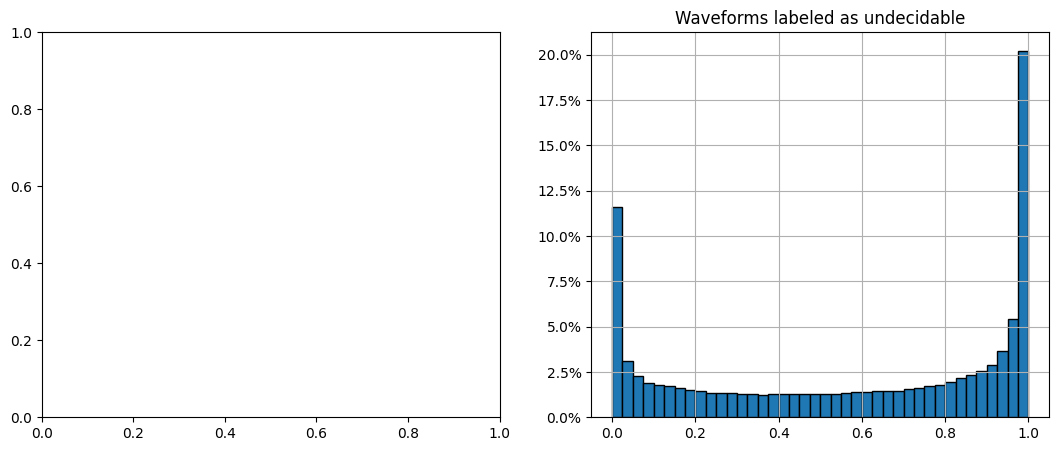

In [19]:
# MCDropout Mean prediction
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

nbins = 40
pat_und = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_More_8_4_vers_3.csv"
datapd_und = pd.read_csv(pat_und)
datapd_und = datapd_und.drop(["traccia", "y_mano"], axis=1)
mean_und = datapd_und.mean(axis=1)

fig, axi = plt.subplots(1, 2, figsize=(13, 5))

mean_und.hist(bins=nbins, edgecolor="black", ax=axi[1], weights=np.ones(len(mean_und)) / len(mean_und))
axi[1].yaxis.set_major_formatter(PercentFormatter(1))
axi[1].set_title("Waveforms labeled as undecidable", wrap=True)
plt.show()

In [15]:
pat_und1 = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_More_8_4.csv"
datapd_und1 = pd.read_csv(pat_und1)

pat_und2 = "/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_More_8_4_vers_2.csv"
datapd_und2 = pd.read_csv(pat_und2)

In [16]:
datapd_und1

,traccia,y_mano,pred_n_0,pred_n_1,pred_n_2,pred_n_3,pred_n_4,pred_n_5,pred_n_6
0,10000541.MN.AQU..HH,unndecidable,0.792342,0.104974,0.005091,0.000923,0.178074,0.002157,0.001483
1,10000541.MN.AQU..HL,unndecidable,0.022383,0.269717,0.165500,0.177223,0.022923,0.090033,0.666929
2,10000541.IV.ASSB..HH,unndecidable,0.324863,0.241261,0.056267,0.791804,0.843215,0.006281,0.331294
3,10000541.IV.EL6..EH,unndecidable,0.924252,0.590400,0.912755,0.556855,0.614351,0.892641,0.390775
4,10000541.IV.FDMO..HH,unndecidable,0.940775,0.825348,0.285936,0.787246,0.929200,0.921415,0.554808
...,...,...,...,...,...,...,...,...,...
922832,908231.IV.T0813..HN,unndecidable,0.565006,0.102458,0.486926,0.160813,0.613281,0.952305,0.578319
922833,908231.IV.T0816..EH,unndecidable,0.998479,0.999856,0.999809,0.999816,0.999822,0.994320,0.998291
922834,908231.IV.T0816..HN,unndecidable,0.999476,0.988286,0.997269,0.998863,0.989052,0.997758,0.999399
922835,908231.IV.T0817..EH,unndecidable,0.977421,0.945408,0.976795,0.934438,0.994135,0.323364,0.977972


In [17]:
datapd_und2

,traccia,y_mano,pred_n_0,pred_n_1,pred_n_2,pred_n_3,pred_n_4,pred_n_5,pred_n_6
0,10000541.MN.AQU..HH,unndecidable,0.029180,0.040979,0.234030,0.003267,0.022147,0.096663,0.011785
1,10000541.MN.AQU..HL,unndecidable,0.022470,0.058900,0.033252,0.025379,0.363424,0.046677,0.007114
2,10000541.IV.ASSB..HH,unndecidable,0.857487,0.375093,0.016795,0.925533,0.105080,0.597319,0.050115
3,10000541.IV.EL6..EH,unndecidable,0.871779,0.590811,0.820949,0.590855,0.808117,0.608504,0.693202
4,10000541.IV.FDMO..HH,unndecidable,0.266506,0.251713,0.531556,0.138678,0.924709,0.797978,0.533288
...,...,...,...,...,...,...,...,...,...
922832,908231.IV.T0813..HN,unndecidable,0.107625,0.694650,0.873884,0.879317,0.844129,0.093384,0.045232
922833,908231.IV.T0816..EH,unndecidable,0.999648,0.994106,0.997978,0.999795,0.995673,0.999816,0.999432
922834,908231.IV.T0816..HN,unndecidable,0.999251,0.998244,0.998207,0.996824,0.998107,0.995197,0.999144
922835,908231.IV.T0817..EH,unndecidable,0.977052,0.853146,0.978437,0.930341,0.937727,0.748677,0.376111


## Test

In [60]:
impostazione = "1"          # quale rete prendere (per ora More 1 o More 2 o etc)
replica = "4"               # scelgo rete More_impostazione / replica
quante_predizioni = 7
salva_predizioni = True
time_shift = 0

tent = f"More_{impostazione}_{replica}"
model_pat = f'/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/More_{impostazione}/{replica}/Tentativo_{tent}.hdf5'
model = keras.models.load_model(model_pat)
model.summary()

model_MCD = keras.models.Sequential([
        model.get_layer(index=0),
        MCDropout(0.5),
        model.get_layer(index=2),
        model.get_layer(index=3),
        model.get_layer(index=4),
        model.get_layer(index=5),
        model.get_layer(index=6),
        MCDropout(0.5),
        model.get_layer(index=8),
        model.get_layer(index=9),
        model.get_layer(index=10),
        model.get_layer(index=11),
        model.get_layer(index=12),
    ])
model_MCD.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 160, 32)           192       
                                                                 
 dropout_8 (Dropout)         (None, 160, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 157, 64)           8256      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 78, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 76, 128)           24704     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 38, 128)          0         
 g1D)                                                 

In [61]:
nome_predizione = f"/home/silvia/Documents/GitHub/primoprogetto/Codici/Tentativi/Bag_predictions/MCDrop_Instance_undecidable_23_09_2023_Parziale.csv"
quante_predizioni = 100
pred = pd.DataFrame.from_dict({"traccia":Data_predicting.metadata["trace_name"][0:10000], "y_mano": "unndecidable"})

for i in range(quante_predizioni):
    predici(model_MCD, xtest[0:10000], pred, i, batch=2048)
    for k in range(15):
        gc.collect()
    """y_predicted = model_MCD.predict(xtest, batch_size=2048)
    y_predicted = np.reshape(y_predicted,len(y_predicted))
    pred[f"pred_n_{i}"] = y_predicted"""


if salva_predizioni:
    pred.to_csv(nome_predizione, index=False)

5/5 [==============================] - 0s 29ms/step


/tmp/ipykernel_37077/1017017914.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred[f"pred_n_{i}"] = y_predicted


In [62]:
pred

,traccia,y_mano,pred_n_0,pred_n_1,pred_n_2,pred_n_3,pred_n_4,pred_n_5,pred_n_6,pred_n_7,...,pred_n_90,pred_n_91,pred_n_92,pred_n_93,pred_n_94,pred_n_95,pred_n_96,pred_n_97,pred_n_98,pred_n_99
0,10000541.MN.AQU..HH,unndecidable,0.123381,0.038152,0.572973,0.920085,0.947411,0.866792,0.728959,0.683048,...,0.917144,0.103418,0.008141,0.337947,0.155045,0.886082,0.020151,0.299275,0.937565,0.914868
1,10000541.MN.AQU..HL,unndecidable,0.038481,0.076701,0.749603,0.030688,0.152479,0.042610,0.050688,0.032625,...,0.086205,0.449472,0.026507,0.017352,0.173560,0.292348,0.439372,0.037589,0.027071,0.021043
2,10000541.IV.ASSB..HH,unndecidable,0.606210,0.794301,0.175895,0.054469,0.942133,0.544560,0.458900,0.284713,...,0.102599,0.490736,0.554072,0.107832,0.904046,0.731034,0.004773,0.046726,0.600748,0.784990
3,10000541.IV.EL6..EH,unndecidable,0.969311,0.961461,0.907625,0.975355,0.753013,0.993439,0.981944,0.786570,...,0.984230,0.987917,0.926259,0.773300,0.994778,0.929178,0.917812,0.997539,0.960747,0.994621
4,10000541.IV.FDMO..HH,unndecidable,0.307687,0.069761,0.265191,0.153754,0.073180,0.130033,0.095199,0.191538,...,0.134716,0.008608,0.006645,0.080719,0.690217,0.114405,0.868282,0.070570,0.584405,0.047698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10303281.IV.T1201..HN,unndecidable,0.494744,0.354739,0.671632,0.316356,0.852098,0.284129,0.089517,0.014196,...,0.412473,0.296322,0.115516,0.593992,0.426344,0.272397,0.587912,0.409184,0.676660,0.525626
9996,10303281.IV.T1202..EH,unndecidable,0.705762,0.888275,0.254266,0.278145,0.295203,0.705677,0.843565,0.608456,...,0.363505,0.650344,0.206836,0.064605,0.659531,0.332448,0.101751,0.896541,0.253214,0.300694
9997,10303281.IV.T1212..EH,unndecidable,0.961673,0.888356,0.975543,0.895631,0.874334,0.996410,0.954898,0.960566,...,0.478632,0.875082,0.934134,0.933060,0.829478,0.203303,0.953240,0.873532,0.965241,0.903092
9998,10303281.IV.T1212..HN,unndecidable,0.617738,0.581122,0.214801,0.522342,0.664997,0.117774,0.651018,0.231011,...,0.473517,0.113250,0.166691,0.726566,0.657647,0.513526,0.561859,0.285607,0.543441,0.234829


In [63]:
pred_new = pred.drop(["traccia","y_mano"], axis = 1)
pred_new

,pred_n_0,pred_n_1,pred_n_2,pred_n_3,pred_n_4,pred_n_5,pred_n_6,pred_n_7,pred_n_8,pred_n_9,...,pred_n_90,pred_n_91,pred_n_92,pred_n_93,pred_n_94,pred_n_95,pred_n_96,pred_n_97,pred_n_98,pred_n_99
0,0.123381,0.038152,0.572973,0.920085,0.947411,0.866792,0.728959,0.683048,0.364772,0.028395,...,0.917144,0.103418,0.008141,0.337947,0.155045,0.886082,0.020151,0.299275,0.937565,0.914868
1,0.038481,0.076701,0.749603,0.030688,0.152479,0.042610,0.050688,0.032625,0.130553,0.140405,...,0.086205,0.449472,0.026507,0.017352,0.173560,0.292348,0.439372,0.037589,0.027071,0.021043
2,0.606210,0.794301,0.175895,0.054469,0.942133,0.544560,0.458900,0.284713,0.876178,0.545862,...,0.102599,0.490736,0.554072,0.107832,0.904046,0.731034,0.004773,0.046726,0.600748,0.784990
3,0.969311,0.961461,0.907625,0.975355,0.753013,0.993439,0.981944,0.786570,0.973301,0.962049,...,0.984230,0.987917,0.926259,0.773300,0.994778,0.929178,0.917812,0.997539,0.960747,0.994621
4,0.307687,0.069761,0.265191,0.153754,0.073180,0.130033,0.095199,0.191538,0.587109,0.097269,...,0.134716,0.008608,0.006645,0.080719,0.690217,0.114405,0.868282,0.070570,0.584405,0.047698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.494744,0.354739,0.671632,0.316356,0.852098,0.284129,0.089517,0.014196,0.689881,0.381043,...,0.412473,0.296322,0.115516,0.593992,0.426344,0.272397,0.587912,0.409184,0.676660,0.525626
9996,0.705762,0.888275,0.254266,0.278145,0.295203,0.705677,0.843565,0.608456,0.632183,0.792909,...,0.363505,0.650344,0.206836,0.064605,0.659531,0.332448,0.101751,0.896541,0.253214,0.300694
9997,0.961673,0.888356,0.975543,0.895631,0.874334,0.996410,0.954898,0.960566,0.136413,0.992740,...,0.478632,0.875082,0.934134,0.933060,0.829478,0.203303,0.953240,0.873532,0.965241,0.903092
9998,0.617738,0.581122,0.214801,0.522342,0.664997,0.117774,0.651018,0.231011,0.228720,0.812389,...,0.473517,0.113250,0.166691,0.726566,0.657647,0.513526,0.561859,0.285607,0.543441,0.234829


<AxesSubplot:>

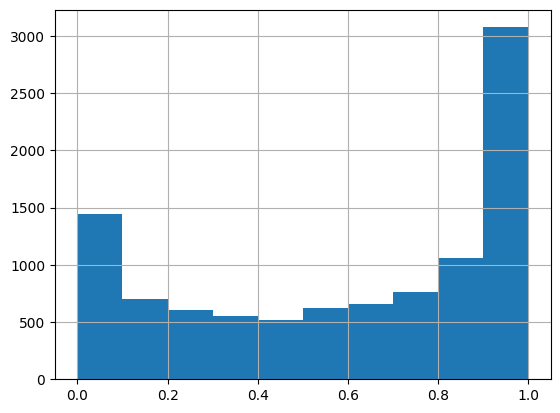

In [49]:
pred_new.mean(axis =1).hist()

array([[<AxesSubplot:title={'center':'pred_n_0'}>,
        <AxesSubplot:title={'center':'pred_n_1'}>],
       [<AxesSubplot:title={'center':'pred_n_2'}>,
        <AxesSubplot:title={'center':'pred_n_3'}>]], dtype=object)

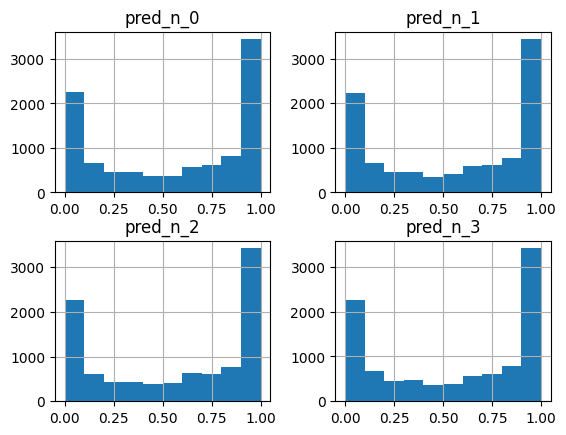

In [68]:
pred_new[["pred_n_0","pred_n_1","pred_n_2","pred_n_3"]].hist()

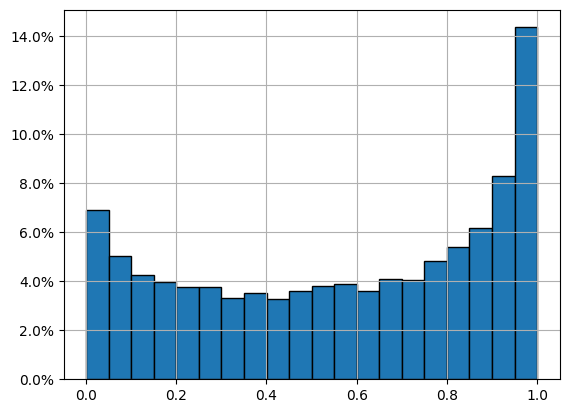

In [105]:
mea = pred_new.mean(axis =1)
ax = mea.hist(bins=20, edgecolor="black", weights=np.ones(len(mea)) / len(mea))
ax.yaxis.set_major_formatter(PercentFormatter(1))

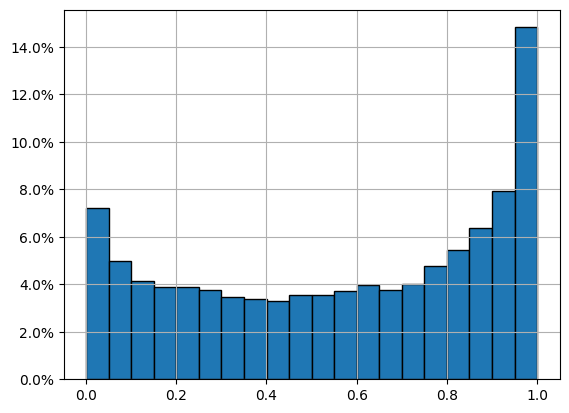

In [127]:
st = 0
ap = 30

mea_few = pred_new.iloc[:,st:st+ap].mean(axis=1)
ax = mea_few.hist(bins=20, edgecolor="black", weights=np.ones(len(mea_few)) / len(mea_few))
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig(f"/home/silvia/Documents/GitHub/primoprogetto/IMG_predict/MCdrop/MCDrop_Instance_undecidable_{ap}_predizioni_More_1_4.png")